## K-Means Clustering

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

In [2]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=0)

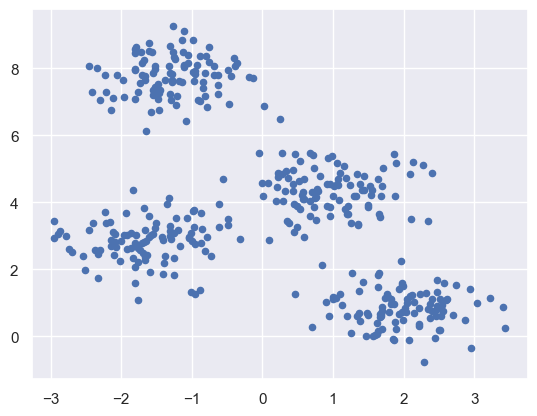

In [3]:
plt.scatter(X[:,0], X[:,1], s=20);
plt.show()

In [4]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

c:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


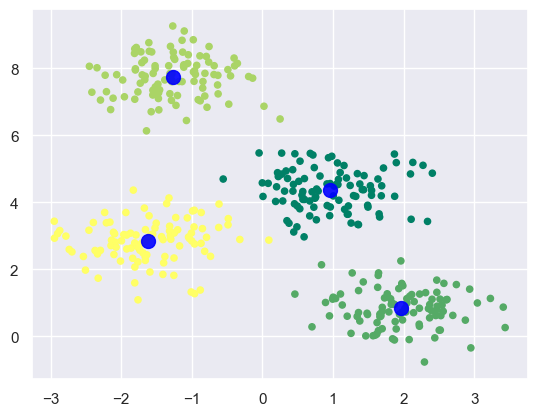

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=20, cmap='summer')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=100, alpha=0.9)
plt.show()

In [6]:
dataset = pd.read_csv('../data-sets/Mall_Customers.csv')

In [7]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
X = dataset.iloc[:, [3, 4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

## Elbow Method

In [ ]:
# import warnings
# warnings.filterwarnings('ignore')

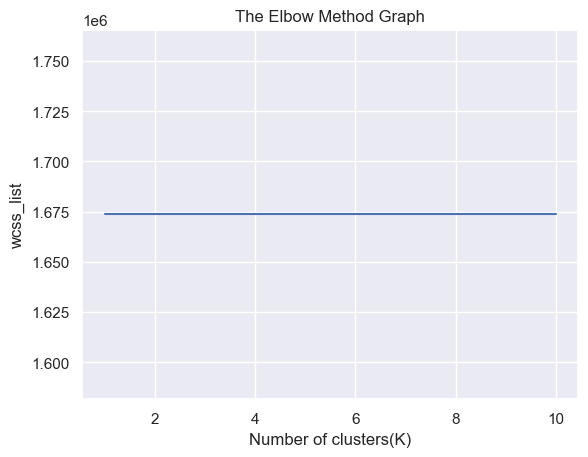

In [11]:
from sklearn.cluster import KMeans

wcss_list = [] #Initializing the list for the values of WCSS
#Using for loop for iterations from 1 to 10.
for i in range(1, 11):
    kmeans = KMeans(n_clusters=1, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss_list.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss_list)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters(K)')
plt.ylabel('wcss_list')
plt.show()


In [35]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_predict = kmeans.fit_predict(X)

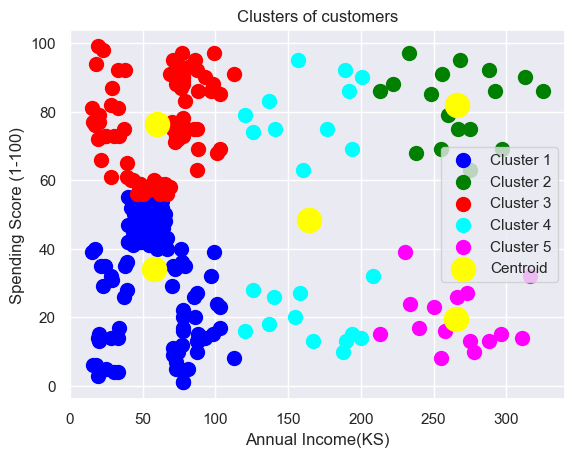

In [36]:
#Visualizing the clusters
plt.scatter(X[y_predict == 0, 0], X[y_predict == 0, 1], s=100,  c='blue', label='Cluster 1') #for first cluster
plt.scatter(X[y_predict == 1, 0], X[y_predict == 1, 1], s=100, c='green', label='Cluster 2') #for second cluster
plt.scatter(X[y_predict == 2, 0], X[y_predict == 2, 1], s=100, c='red', label = 'Cluster 3') #for third cluster
plt.scatter(X[y_predict == 3, 0], X[y_predict == 3, 1], s=100, c='cyan', label = 'Cluster 4') #for third cluster
plt.scatter(X[y_predict == 4, 0], X[y_predict == 4, 1], s=100, c='magenta', label = 'Cluster 5') #for third cluster
# plt.scatter(X[y_predict == 5, 0], X[y_predict == 5, 1], s=100, c='black', label = 'Cluster 6') #for third cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label="Centroid")
plt.title('Clusters of customers')
plt.xlabel('Annual Income(KS)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()